![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [5]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

#Loading the insurance dataset
insurance_data_path =  'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [66]:
## Task #1: Clean up the data
### - Look into --> are there any missing values? O
### - Standardise categories in region O
### - Standardise sex to just two categories O
### - Change smoker column to boolean O
### - Standardise charges data type (float) O
### - Standardise age values

# Dropping any null values
insurance_filled = insurance.dropna()

# Converting all regions to lowercase
insurance_filled['region'] = insurance_filled['region'].str.lower()

# Making sure there are only 4 unique values
insurance_filled['region'].unique()

# Convert all sex values to 'female' and 'male'
sex_map = {'F': 'female', 'woman': 'female', 'man': 'male', 'M': 'male'} 
insurance_filled['sex'] =  insurance_filled['sex'].replace(sex_map)

# Convert smoker column to bool
insurance_filled['smoker'] = (insurance_filled['smoker'] == 'yes')

# Convert charges from object to float64
insurance_filled['charges'] = insurance_filled['charges'].str.strip('$').astype('float64')

# Ensure there are no negative ages
insurance_pos = insurance_filled.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)

insurance_pos.to_csv('cleaned_insurance.csv, index=False')

/var/folders/3w/ykqmpqz10rxg2qhb267hvk980000gn/T/ipykernel_53727/4281794371.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['region'] = insurance_filled['region'].str.lower()
/var/folders/3w/ykqmpqz10rxg2qhb267hvk980000gn/T/ipykernel_53727/4281794371.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['sex'] =  insurance_filled['sex'].replace(sex_map)
/var/folders/3w/ykqmpqz10rxg2qhb267hvk980000gn/T/ipykernel_53727/4281794371.py:23: SettingWithCopyWarning: 
A value is

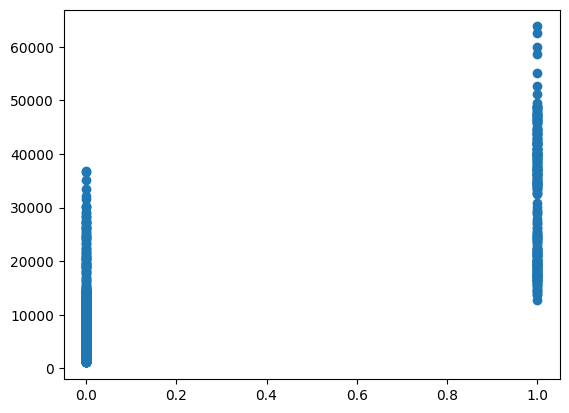

In [73]:
import matplotlib.pyplot as plt

# Task #2: EDA

# Scatterplots of relationships between variables and charges 
df = insurance_pos.copy()

plt.scatter(df['smoker'], df['charges'])


In [95]:
# Task #3 - Prepare the data for a model fitting 

df_new = pd.get_dummies(df, prefix = ['region'], columns = ['region'])

df['region'].value_counts()

df_new = df_new.drop(columns = ['region_southeast'])

df_new[['region_northeast', 'region_southwest', 'region_northwest']] = df_new[['region_northeast', 'region_southwest', 'region_northwest']].astype('int64')
df_new['smoker'] = df_new['smoker'].astype('int64')
df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')

df_new = df_new.dropna()
df_new = df_new.drop(columns = ['sex'])

In [105]:
#Task 4: Fit a linear regression model to our data 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

#Define input and output variables 
X = df_new.drop(columns = ['charges'])
y = df_new['charges']

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Create and train the linear regression model 
model =  LinearRegression()
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Calculate the R squared error 
r2 = r2_score(y_test, y_pred)

#Output the R squared error 
r2

0.7049323160872816

In [130]:
#Task 5: See how model performs on validation dataset 
#Subtask - create helper function to preprocess dataframe 

def preprocess_df(df):
    # One-hot encode 'region', dropping 'southeast' as the reference category
    df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
    df_new = df_new.drop(columns=['region_southeast'], errors='ignore')

    # Convert 'smoker' to binary (1 if 'yes', 0 if 'no')
    df_new['smoker'] = (df_new['smoker'] == 'yes').astype('int64')

    # Convert 'sex' to binary (1 if 'male', 0 if 'female') and drop the original column
    df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
    df_new = df_new.drop(columns=['sex'], errors='ignore')  # Prevents errors if 'sex' isn't present

    return df_new

In [134]:
# Read validation dataset
val_df = pd.read_csv('validation_dataset.csv')

# Preprocess validation data
input_df = preprocess_df(val_df)

# Ensure columns match with training data
missing_cols = set(X.columns) - set(input_df.columns)
for col in missing_cols:
    input_df[col] = 0  # Add missing columns with default value

# Ensure column order is the same as training data
input_df = input_df[X.columns]

# Make predictions
predictions = model.predict(input_df)

#predictions_new = [x if x > 0 else 1000 for x in predictions]

validation_data = val_df.copy()

validation_data['predicted_charges'] = predictions_new

validation_data.head()

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,352.537878
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
